In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## importing the mailbox library
import mailbox

In [2]:
## Load the dataset

mboxfile = 'All mail Including Spam and Trash-002.mbox'
mbox = mailbox.mbox(mboxfile)
mbox

In [3]:
## List of available Keys
for key in mbox[0].keys():
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
X-MSFBL
DKIM-Signature
Content-Transfer-Encoding
Content-Type
To
Message-ID
Date
MIME-Version
Reply-To
Subject
From
List-Unsubscribe
List-Id


## Data Transformation
* We need 'subject' , 'from', 'date', 'to', 'label', 'thread'

### Data Cleansing
* creating the csv file out of mbox

In [4]:
# importing the csv package
import csv

In [5]:
## creating a CSV file with only the required columns
with open('mailbox.csv','w', encoding='utf-8') as outputfile:
    writer = csv.writer(outputfile)
    writer.writerow(['subject','from','date','to','label','thread'])
    for message in mbox:
        writer.writerow([message['subject'],message['from'],message['date'],message['to'],message['X-Gmail-Labels'],message['X-GM-THRID']])

### Loading the csv file 

In [6]:
df = pd.read_csv('mailbox.csv', names=['subject','from','date','to','label','thread'])

In [7]:
## Knowing the data types
df.dtypes

subject    object
from       object
date       object
to         object
label      object
thread     object
dtype: object

In [22]:
## Converting the Date
default_date = pd.Timestamp('2000-01-01')  # choose a default date to use for NaT values
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True).fillna(default_date)

In [23]:
## Removing the NaN values
df = df[df['date'].notna()]

In [24]:
## Saving the preprocessed file again in separate CSV file
df.to_csv('gmail.csv')

## Applying some Descriptive statistics

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30893 entries, 1 to 30899
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  30859 non-null  object             
 1   from     30893 non-null  object             
 2   date     30893 non-null  datetime64[ns, UTC]
 3   label    30893 non-null  object             
 4   thread   30893 non-null  object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 1.4+ MB


In [26]:
df.head(10)

,subject,from,date,label,thread
1,"Abhishek , Online Master's Degrees are in-dema...",mds.deakin@course.mygreatlearning.com,2023-03-23 07:01:32+00:00,inbox,1761140950957578660
2,"Z-Library: ""The Playboy Interview - The Essent...",mailer@1lib.to,2023-03-24 05:34:41+00:00,inbox,1761226103379807013
3,GTT - The perfect risk management tool,noreply@mailers.upstox.com,2023-03-23 04:46:52+00:00,inbox,1761132478994503456
4,Data Analyst at Business Growth Hub and 17 mor...,noreply@glassdoor.com,2023-03-23 10:47:11+00:00,inbox,1761155149513038347
5,Re: Regarding resume tailoring,support@herovired.com,2023-03-23 07:47:28+00:00,inbox,1761143844454797997
6,Funds/Securities Balance,nse_alerts@nse.co.in,2023-03-23 01:14:00+00:00,inbox,1761107118443659459
7,Funds/Securities Balance,nse_alerts@nse.co.in,2023-03-22 22:03:46+00:00,inbox,1761107118443659459
8,Need your advice,noreply-ambitionbox@naukri.com,2023-03-23 12:36:15+00:00,inbox,1761162011179256165
9,IT cos may take 30 bps revenue hit | 3 stocks ...,newsletter@economictimesnews.com,2023-03-22 04:17:23+00:00,inbox,1761040059873592753
10,You did it Abhishek =?UTF-8?B?8J+ZjA==?= 3 mon...,marketing@engage.canva.com,2023-03-22 04:03:47+00:00,inbox,1761039172605171536


## Data Refactoring

In [27]:
## Importing regular expression
import re

In [28]:
## Creating a function that takes entire string and return email address
def extract_email_ID(string):
    email = re.findall(r'<(.+?)>', string)
    if not email:
        email = list(filter(lambda y: '@' in y, string.split()))
    return email[0] if email else np.nan

In [29]:
## Applying the function to 'from' column
df['from'] = df['from'].apply(lambda x: extract_email_ID(x))

In [30]:
## Refactoring the 'Label' field
myemail = 'baswan.abhishek@gmail.com'
df['label'] = df['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

## Dropping columns

In [17]:
## Here 'to' column is irrelevant because we already know that all the mails are inbox from 'label' column
df.drop(columns='to', inplace=True)

In [31]:
df.head(5)

,subject,from,date,label,thread
1,"Abhishek , Online Master's Degrees are in-dema...",mds.deakin@course.mygreatlearning.com,2023-03-23 07:01:32+00:00,inbox,1761140950957578660
2,"Z-Library: ""The Playboy Interview - The Essent...",mailer@1lib.to,2023-03-24 05:34:41+00:00,inbox,1761226103379807013
3,GTT - The perfect risk management tool,noreply@mailers.upstox.com,2023-03-23 04:46:52+00:00,inbox,1761132478994503456
4,Data Analyst at Business Growth Hub and 17 mor...,noreply@glassdoor.com,2023-03-23 10:47:11+00:00,inbox,1761155149513038347
5,Re: Regarding resume tailoring,support@herovired.com,2023-03-23 07:47:28+00:00,inbox,1761143844454797997


## Refactoring timezones


In [32]:
# importing the libraries 
import datetime
import pytz

# defining the function to refactor timezones
def refactor_timezone(x):
    est = pytz.timezone('Asia/Kolkata')
    return x.astimezone(est)

In [33]:
## Let's call the function
df['date'] = df['date'].apply(lambda x: refactor_timezone(x))

In [34]:
## Adding day of the week
df['dayofweek'] = df['date'].apply(lambda x: x.strftime("%A"))
df['dayofweek'] = pd.Categorical(df['dayofweek'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday'], ordered=True)

In [35]:
## We do the same process for the time of the day
df['timeofday'] = df['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [36]:
## refactor the hour
df['hour'] = df['date'].apply(lambda x: x.hour)

## Refactor the year integer
df['year_int'] = df['date'].apply(lambda x: x.year)

## refactor the year fraction
df['year'] = df['date'].apply(lambda x: x.year + x.dayofyear/365.25)

## setting 'date' to index 
df.index = df['date']
del df['date']

In [37]:
df.head(5)

,subject,from,label,thread,dayofweek,timeofday,hour,year_int,year
date,,,,,,,,,
2023-03-23 12:31:32+05:30,"Abhishek , Online Master's Degrees are in-dema...",mds.deakin@course.mygreatlearning.com,inbox,1761140950957578660,Thursday,12.525556,12,2023,2023.224504
2023-03-24 11:04:41+05:30,"Z-Library: ""The Playboy Interview - The Essent...",mailer@1lib.to,inbox,1761226103379807013,Friday,11.078056,11,2023,2023.227242
2023-03-23 10:16:52+05:30,GTT - The perfect risk management tool,noreply@mailers.upstox.com,inbox,1761132478994503456,Thursday,10.281111,10,2023,2023.224504
2023-03-23 16:17:11+05:30,Data Analyst at Business Growth Hub and 17 mor...,noreply@glassdoor.com,inbox,1761155149513038347,Thursday,16.286389,16,2023,2023.224504
2023-03-23 13:17:28+05:30,Re: Regarding resume tailoring,support@herovired.com,inbox,1761143844454797997,Thursday,13.291111,13,2023,2023.224504


# Data Analysis

In [38]:
## Number of emails
print(df.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(df.index.max().strftime('%a, %d %b %Y %I:%M %p'))

print(df['label'].value_counts())

Fri, 21 Jun 2013 10:41 AM
Fri, 24 Mar 2023 08:11 PM
inbox    30750
sent       143
Name: label, dtype: int64


In [39]:
## Time of day

# creating two sub dataframe
sent = df[df['label']=='sent']
received = df[df['label']=='inbox']

In [40]:
## Importing the data visualization library
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import ndimage
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

In [41]:
## Define a function to plot 
def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
    ind = np.zeros(len(df), dtype='bool')
    est = pytz.timezone('Asia/Kolkata')
    df[~ind].plot.scatter('year','timeofday',s=s, alpha=0.6, ax=ax, color=color)
    ax.set_ylim(0,24)
    ax.yaxis.set_major_locator(MaxNLocator(8))
    
    # Create a FixedLocator with the same number of ticks as the MaxNLocator
    ticks = MaxNLocator(8).tick_values(0, 24)
    ax.set_yticks(ticks)
    
    # Set the tick labels using a FixedFormatter
    ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,24))), '%H').strftime("%I %p") for ts in ticks])
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    ax.grid(ls=':', color='k')
    
    return ax

<AxesSubplot:title={'center':'Received'}>

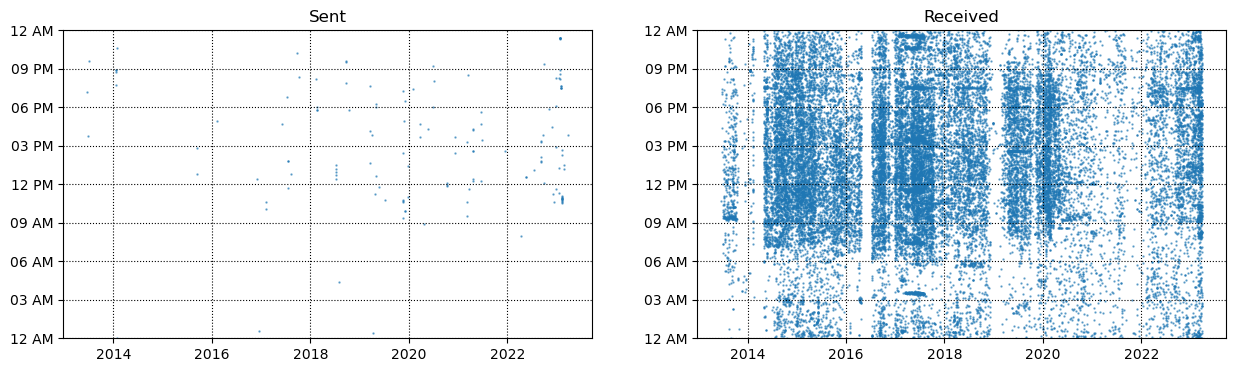

In [42]:
## ploting the figure for both 'sent' and 'inbox'
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')

# Average emails per day and hour

In [43]:
## we need to define two function to count emails per day and avg. emails per hour

def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T/ dt)
    weights = 1/ (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')

In [44]:
## creating a function to plots avg. emails per hour

import datetime
import numpy as np
from matplotlib.ticker import MaxNLocator
from scipy import ndimage
from scipy.interpolate import interp1d

def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False,
                                  weight_fun=None, **plot_kwargs):

    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights)
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs)


    ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        
        # Create a FixedLocator with the same number of ticks as the MaxNLocator
        ticks = MaxNLocator(8).tick_values(0, 24)
        ax.set_xticks(ticks)
        
        # Set the tick labels using a FixedFormatter
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ticks])
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        
        # Create a FixedLocator with the same number of ticks as the MaxNLocator
        ticks = MaxNLocator(8).tick_values(0, 24)
        ax.set_yticks(ticks)
        
        # Set the tick labels using a FixedFormatter
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ticks])
    return ax


In [45]:
## creating a class to plot time of the day vs. year for all the emails

class TriplePlot:
  def __init__(self):
    gs = gridspec.GridSpec(6, 6)
    self.ax1 = plt.subplot(gs[2:6, :4])
    self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
    plt.setp(self.ax2.get_yticklabels(), visible=False);
    self.ax3 = plt.subplot(gs[:2, :4])  
    plt.setp(self.ax3.get_xticklabels(), visible=False);

  def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
    plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
    plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
    self.ax2.set_xlabel('Average emails per hour')
    plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
    self.ax3.set_ylabel('Average emails per day')

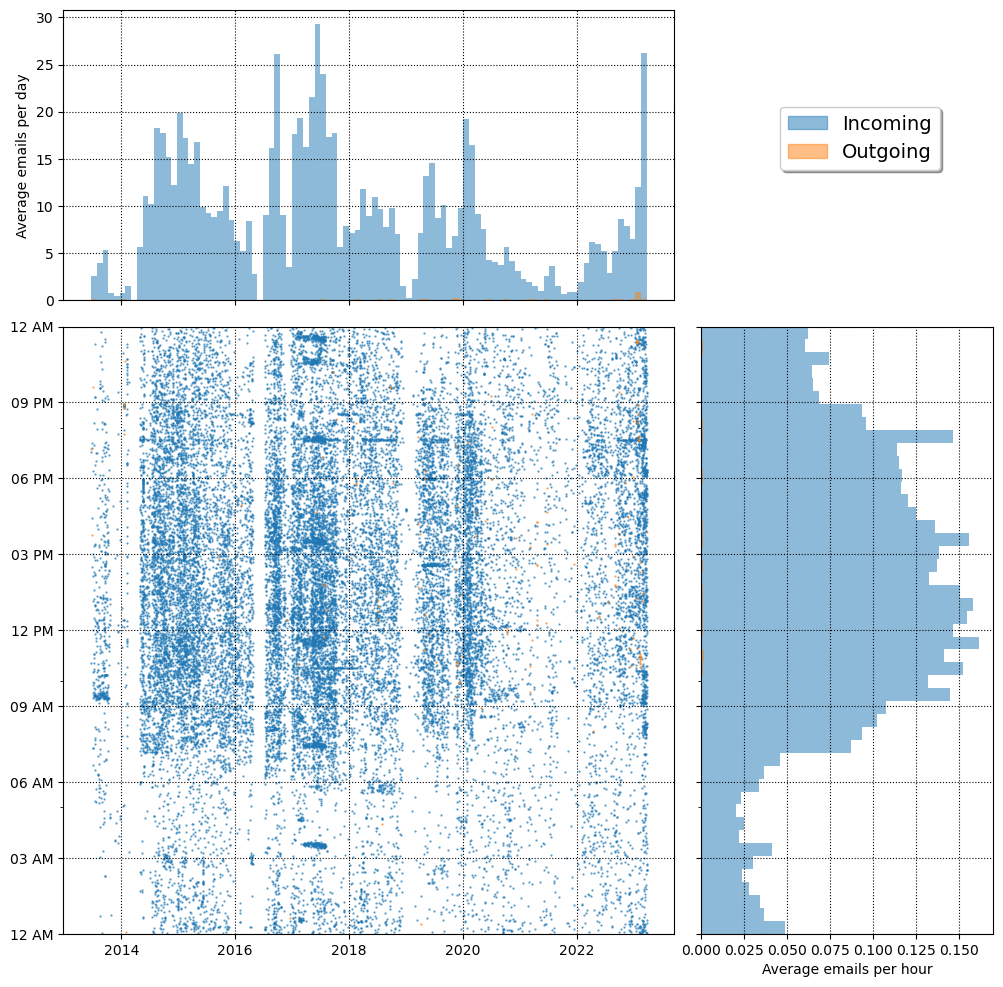

In [46]:
## Initiating the class for ploting the graph:

plt.figure(figsize=(12,12));
tpl = TriplePlot()

tpl.plot(received, color='C0', alpha=0.5)
tpl.plot(sent, color='C1', alpha=0.5)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=14, shadow=True);

# Number of emails per day

<AxesSubplot:>

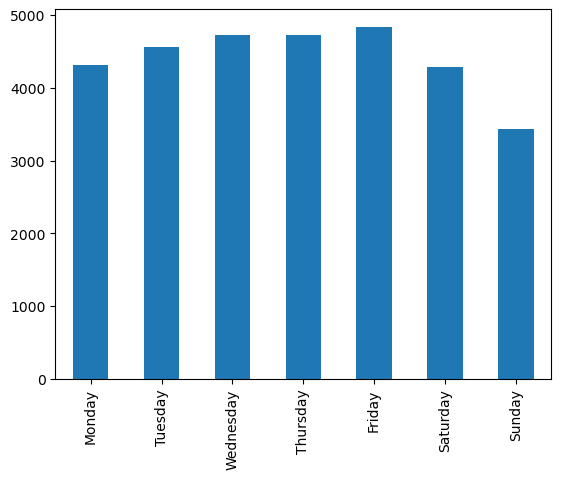

In [47]:
counts = df.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

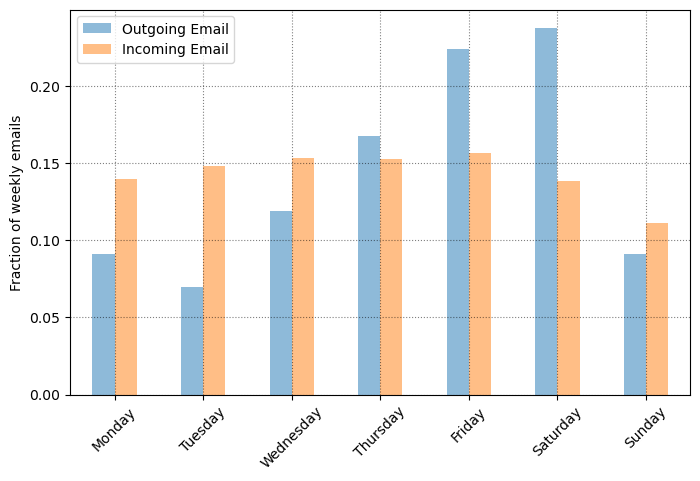

In [48]:
## most active day of sending and receiving emails
sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)

df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

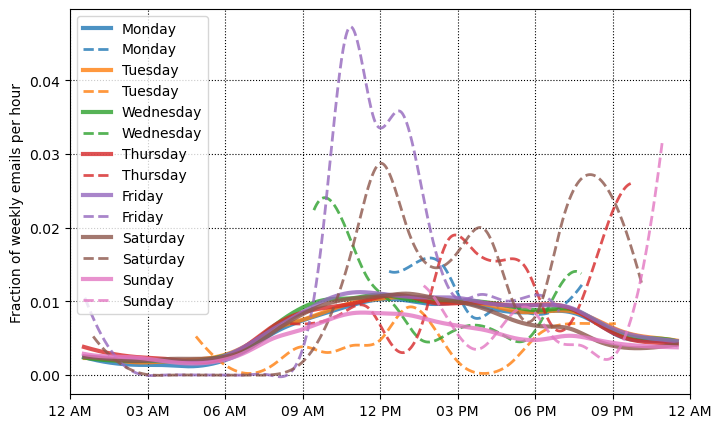

In [49]:
## most active time of the day for email communication:
plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for ct, dow in enumerate(df.dayofweek.cat.categories):
    df_r = received[received['dayofweek']==dow]
    weights = np.ones(len(df_r)) / len(received)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_r, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=3, label=dow, weight_fun=wfun)

    df_s = sent[sent['dayofweek']==dow]
    weights = np.ones(len(df_s)) / len(sent)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_s, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
ax.set_ylabel('Fraction of weekly emails per hour')
plt.legend(loc='upper left')

# Most frequently used words

In [50]:
# let's first remove the archived emails:
from wordcloud import WordCloud

df_no_arxiv = df[df['from'] != 'no-reply@arXiv.org']
text = ' '.join(map(str, sent['subject'].values))

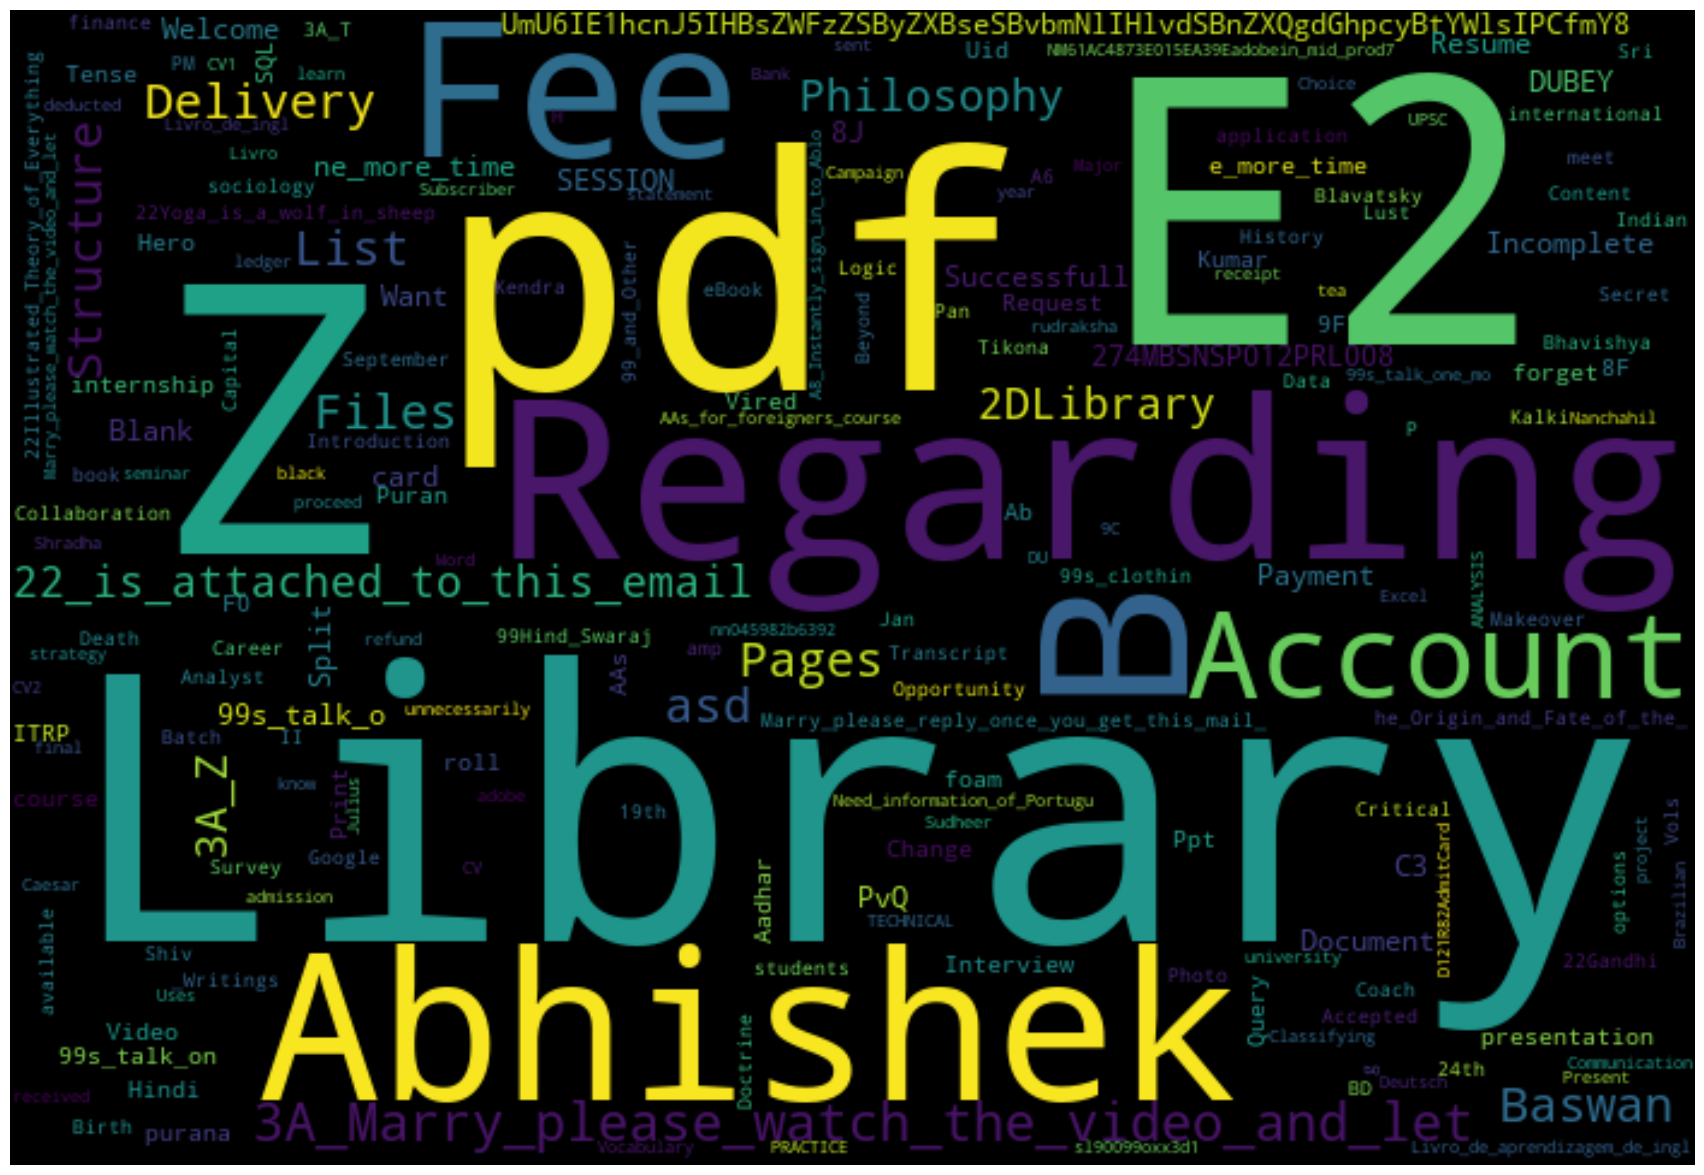

In [53]:
## let's plot the word cloud:

stopwords = ['Re', 'Fwd', '3A_', 'nan', 'UTF', 'Q', 'unsubscribe', 'email','attached','2E']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)

# ThankYou